### Main notebook

In [1]:
import pandas as pd
import numpy as np
import json
import networkx as nx
from tqdm import tqdm
from compound import Compound
from reaction import Reaction
from graph import Graph
from data import Data

# read data from csv
cpds = pd.read_csv('../GNN_toxic/data/raw/compounds_final.csv', index_col=0) # containing toxicity
rxns = pd.read_csv('data/reactions_final.csv', index_col=0)
pairs = pd.read_csv('data/pairs_final.csv', index_col=0)
cofactors = pd.read_csv('data/original/cofactors_KEGG.csv')

# create class instances
data = Data()
graph = Graph(pairs=pairs)

# Create a Compound object for each row in the DataFrame and add it to the data
for index, row in cpds.iterrows():
    entry = row['Entry']
    name = row['Names']
    formula = row['Formula']
    mw = row['mol_weight']
    smiles = row['SMILES']
    is_cofactor = row['Entry'] in cofactors['Entry'].values
    is_toxic = row['toxic']

    compound = Compound(entry, name, formula, mw, smiles, is_cofactor, is_toxic)
    data.add_element('compound', compound)

# Create a Reaction object for each row in the DataFrame and add it to the data
for index, row in rxns.iterrows():
    entry = row['Entry']
    name = row['Names']
    compounds = row['Compound']
    enzyme = row['EC Number']

    reaction = Reaction(entry, name, compounds, enzyme)
    data.add_element('reaction', reaction)

In [2]:
# CREATE GRAPH
graph.create_graph(data=data, pairs=pairs)

# nodes: 8591 
# edges: 30026


100%|██████████| 8591/8591 [00:08<00:00, 980.22it/s] 


In [3]:
graph.calculate_edge_mol_weight(data)
graph.calculate_smiles_similarity(data)

  1%|          | 339/30026 [00:00<00:21, 1358.95it/s][14:38:54] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:54] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:54] WARNING: not removing hydrogen atom without neighbors
  3%|▎         | 869/30026 [00:00<00:22, 1322.77it/s][14:38:54] WARNING: not removing hydrogen atom without neighbors
[14:38:54] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:54] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:54] WARNING: not removing hydrogen atom with dummy atom neighbors
 11%|█         | 3339/30026 [00:02<00:24, 1106.06it/s][14:38:56] WARNING: not removing hydrogen atom without neighbors
[14:38:56] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:56] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:38:56] WARNING: not removing hydrogen atom without neighbors
 13%|█▎        | 3944/30026 [00:02<00:19, 1364.87it/s][14:38:56] WARN

In [4]:
######### VALIDATION SET FROM nicepath ###########
test_cases = pd.read_csv('data/original/test_cases.csv')
test_cases['source'] = test_cases['Pathway '].apply(lambda x: x.split(',')[0])
test_cases['target'] = test_cases['Pathway '].apply(lambda x: x.split(',')[len(x.split(','))-1])
test_cases['paths_list'] = test_cases['Pathway '].apply(lambda x: x.split(','))
paths = graph.validate(test_cases, 'mol_weight')

100%|██████████| 50/50 [01:22<00:00,  1.66s/it]

Correct pathway predictions: 19
Correct pathway predictions (%): 38.0


In [5]:
1/0

ZeroDivisionError: division by zero

### Study graph

In [ ]:
weights = []
for edge in graph.G.edges(data=True):
    weights.append(edge[2]['mol_weight'])

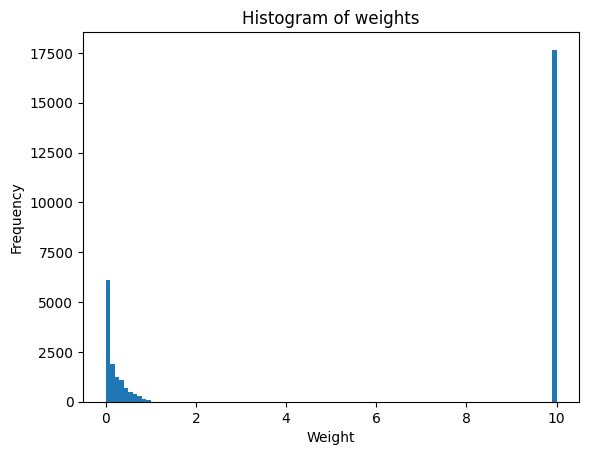

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(data, title, xlabel, ylabel, bins=100):
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_histogram(weights, 'Histogram of weights', 'Weight', 'Frequency')

In [ ]:
test_cases.iloc[16]['Pathway ']

'C00047,C04076,C00450,C00408'

In [ ]:
paths[~paths['Correct']]

,Pathway,Correct
1,"[C00223, C12096, C00029, C00761]",False
4,"[C00223, C12096, C00029, C17750]",False
9,"[C05905, C08604, C12095, C12096, C16299]",False
10,"[C05904, C12137, C12640, C12641, C12647]",False
11,"[C05908, C12138, C16301, C16303]",False
12,"[C00078, C00398, C21762, C21778, C07576]",False
13,"[C06160, C06161, C06517, C06520, C02105, C0210...",False
15,"[C00079, C01456, C02046, C10860]",False
16,"[C00047, C00408]",False
17,"[C07481, C07130, C00385]",False


In [ ]:
graph.num_occurences

,0
0,
C00001,9968
C00080,6569
C00007,5235
C00006,3501
C00003,3248
...,...
C21281,1
C21282,1
C05571,1


### Try cluster graph nodes

### Try similarity based on SMILES

In [ ]:
smiles1 = data.get_compound_by_id('C00223').smiles
smiles2 = data.get_compound_by_id('C00323').smiles

from rdkit import Chem
from rdkit import DataStructs

ms = [Chem.MolFromSmiles(smiles1), Chem.MolFromSmiles(smiles2)]
fs = [Chem.RDKFingerprint(x) for x in ms]
s = DataStructs.FingerprintSimilarity(fs[0], fs[1])
print('Similarity: '+str(s))


smiles1 = data.get_compound_by_id('C00223').smiles
smiles2 = data.get_compound_by_id('C12096').smiles

from rdkit import Chem
from rdkit import DataStructs

ms = [Chem.MolFromSmiles(smiles1), Chem.MolFromSmiles(smiles2)]
fs = [Chem.RDKFingerprint(x) for x in ms]
s = DataStructs.FingerprintSimilarity(fs[0], fs[1])
print('Similarity: '+str(s))

Similarity: 0.989145183175034
Similarity: 0.5102379634753735
